In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import hc_lib.plots.figlib as flib
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy

In [2]:
SIM = 'tng100'
SNAP = 67


In [3]:
from scipy.ndimage.filters import gaussian_filter


def extractData():
    data = []
    print(len(f.results['2Dpk']))
    for d in f.results['2Dpk']:
        data.append(d.getValues())
        print(d.getProp('color'))
        print(d.getProp('space'))
    return data

def plot_pk(ax, cax, pk2d, cmap = 'viridis', vlim = [0, 4.5], nlevels = 100, cont_spacing = 0.5, smooth_sigma = 0.6):
    plt.sca(ax)
    vmin, vmax = vlim
    norm = mpl.colors.Normalize(vmin, vmax)
    nlevels = 100
    kpar = np.unique(pk2d[0])
    kper = np.unique(pk2d[1])
    KPAR, KPER = np.meshgrid(kpar, kper)
    pk = np.reshape(pk2d[2], KPAR.shape)
    levels = np.linspace(vmin, vmax, nlevels)
    lo_mask = pk <= 10**vmin
    hi_mask = pk > 10**vmax
    pk[lo_mask] = 10**vmin
    pk[hi_mask] = 10**vmax
    plt.contourf(KPAR, KPER, np.log10(pk), levels = levels, cmap = cmap, vmin = vmin, vmax = vmax)
    smap = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
    plt.colorbar(smap, cax = cax)
    data = gaussian_filter(np.log10(pk), sigma = smooth_sigma)
    plt.contour(KPAR, KPER, data, levels = np.arange(vmin, vmax+cont_spacing, cont_spacing), colors = 'black')
    circles = np.sqrt(np.log10(KPAR) ** 2 + np.log10(KPER) **2)
    plt.contour(KPAR, KPER, circles, levels = 100, colors = 'black', linestyles = ':')
    plt.xlim(.1, 5)
    plt.ylim(.1, 5)
    plt.xscale('log')
    plt.yscale('log')
    return

In [5]:
f = pkl.load(open('/home/cosinga/scratch/hcolor/output/alt_%sB_%03dS_0A_800R/results/galaxygrid_%sB_%03dS_0A_800R.pkl_rlib.pkl'%(SIM, SNAP, SIM, SNAP), 'rb'))

data = extractData()
blue = data[0]
red = data[1]

6
blue
real
red
real
resolved
real
blue
redshift
red
redshift
resolved
redshift


Text(0, 0.5, 'log ($P(k)$ (cMpc / h)$^3$)')

<Figure size 432x288 with 0 Axes>

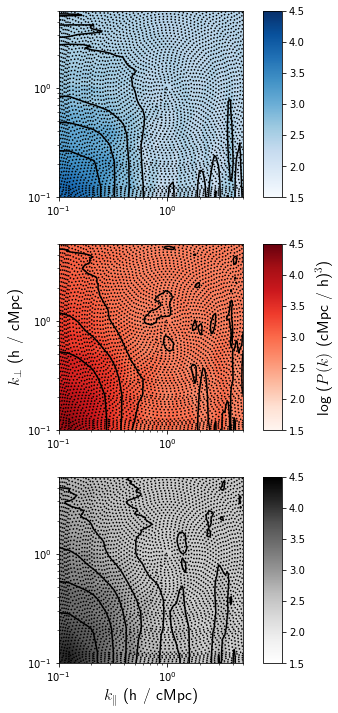

In [33]:
plt.clf()
fig, axes = plt.subplots(3, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 12))
cmaps = ['Blues', 'Reds', 'Greys']
for i in range(3):
    plot_pk(axes[i, 0], axes[i, 1], data[i], cmap = cmaps[i], vlim = [1.5, 4.5], cont_spacing = 0.25, smooth_sigma = 1.0)
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)

In [ ]:
f = pkl.load(open('/home/cosinga/scratch/hcolor/output/fiducial_%sB_%03dS_0A_800R/results/vnXgalaxy_%sB_%03dS_0A_800R.pkl_rlib.pkl'%(SIM, SNAP, SIM, SNAP), 'rb'))


In [ ]:
data = extractData()

In [ ]:

fig, axes = plt.subplots(3, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 12))
cmaps = ['Blues', 'Reds', 'Greys']
for i in range(3):
    print('finished_plot')
    plot_pk(axes[i, 0], axes[i, 1], data[i], cmap = cmaps[i], vlim = [-4, 4], cont_spacing = 1)
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)